In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('infolimpioavanzadoTarget.csv',nrows=100)

In [4]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [40]:
data_new = data[['open','high','low','close','adjclose','volume','TARGET']]
data_new.head(100)

,open,high,low,close,adjclose,volume,TARGET
0,17.799999,18.219000,17.500000,17.760000,17.760000,106600,0
1,17.700001,18.309999,17.620001,17.660000,17.660000,128700,0
2,17.580000,17.799999,16.910000,16.950001,16.950001,103100,0
3,16.650000,16.879999,16.139999,16.170000,16.170000,173600,0
4,16.219999,16.290001,15.630000,15.710000,15.710000,137800,0
...,...,...,...,...,...,...,...
95,13.140000,13.710000,13.024000,13.570000,13.570000,100100,0
96,13.810000,13.810000,13.410000,13.590000,13.590000,57800,0
97,13.660000,14.020000,13.395000,13.920000,13.920000,132200,0
98,13.810000,14.120000,13.610000,14.100000,14.100000,74700,0


In [41]:
print(data_new.shape)

(100, 7)


In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      100 non-null    float64
 1   high      100 non-null    float64
 2   low       100 non-null    float64
 3   close     100 non-null    float64
 4   adjclose  100 non-null    float64
 5   volume    100 non-null    int64  
 6   TARGET    100 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


In [43]:
data_new.describe()

,open,high,low,close,adjclose,volume,TARGET
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,15.193450,15.523180,14.846800,15.148100,15.148100,1.138300e+05,0.140000
std,1.006902,1.028213,1.022056,0.999729,0.999729,1.125977e+05,0.348735
min,13.120000,13.550000,12.780000,12.860000,12.860000,3.440000e+04,0.000000
25%,14.432500,14.722500,14.035000,14.387500,14.387500,6.585000e+04,0.000000
50%,15.450000,15.737500,15.082500,15.425000,15.425000,8.625000e+04,0.000000
75%,15.850000,16.187500,15.555000,15.780000,15.780000,1.343500e+05,0.000000
max,17.799999,18.309999,17.620001,17.760000,17.760000,1.108800e+06,1.000000


In [44]:
data_new.isnull().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
TARGET      0
dtype: int64

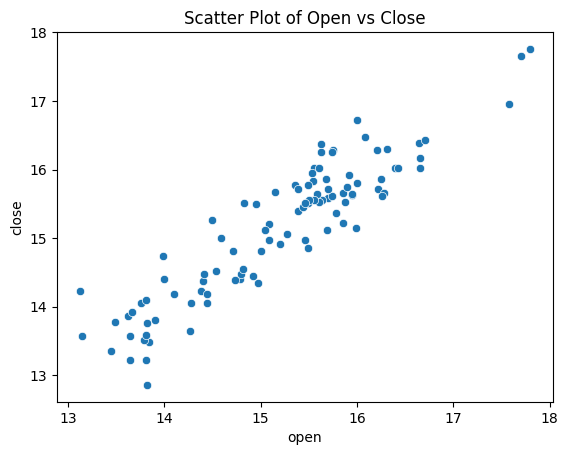

In [53]:
sns.scatterplot(x='open', y='close', data=data)
plt.title('Scatter Plot of Open vs Close')
plt.show()

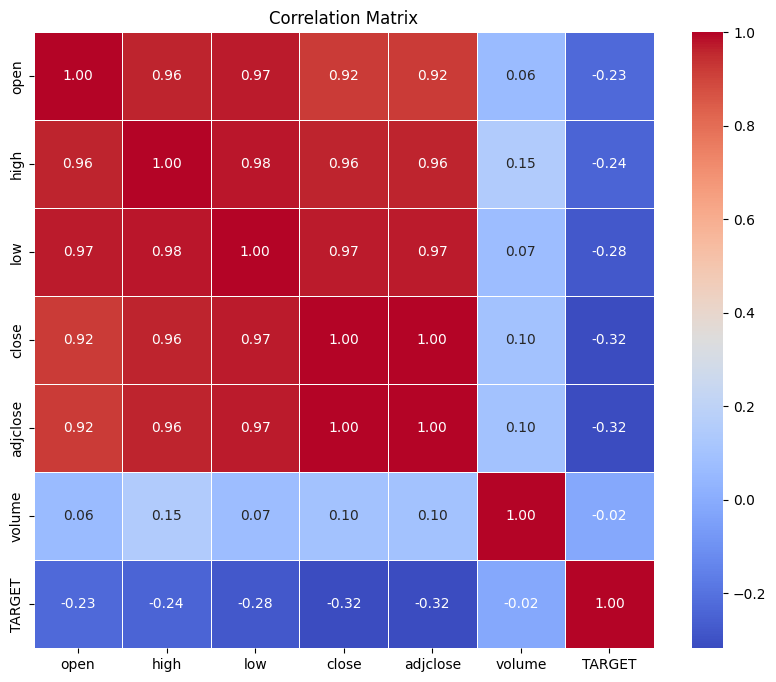

In [47]:
correlation_matrix = data_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

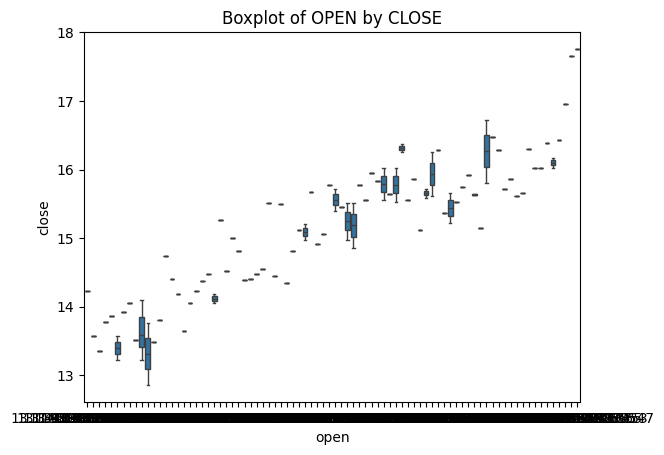

In [48]:
sns.boxplot(x='open', y='close', data=data_new)
plt.title('Boxplot of OPEN by CLOSE')
plt.show()

In [52]:
def prepare_data(data_new):
    X = data_new[[ 'open']]  
    y = data_new['close']  
    return X, y


Mean Squared Error: 0.1499005427557077


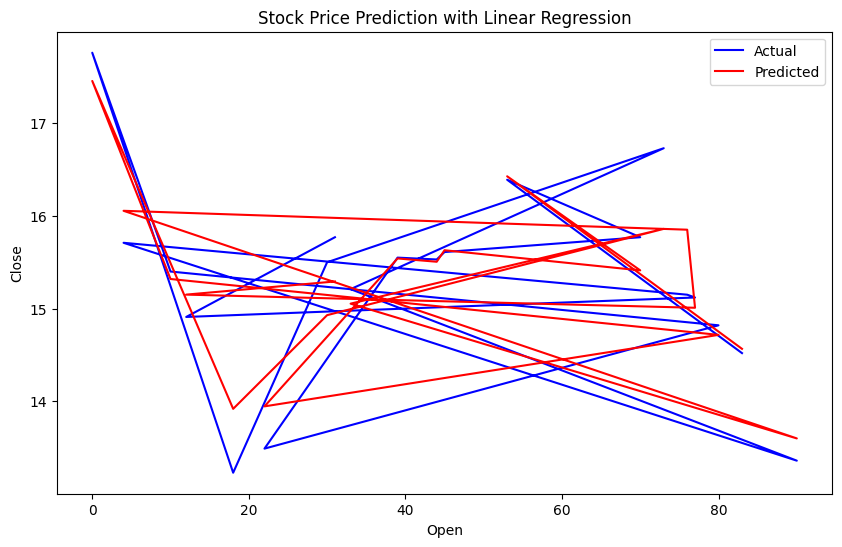

In [54]:
def predict_stock_price_with_linear_regression(data_new):
    X, y = prepare_data(data_new)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)    
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red')
    plt.title('Stock Price Prediction with Linear Regression')
    plt.xlabel('Open')
    plt.ylabel('Close')
    plt.legend()
    plt.show()
predict_stock_price_with_linear_regression(data)